# Definição da classe nodo

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class Node:
    
    def __init__(self, num, nome):
        self.num=num
        self.nome=nome

# Funções Auxiliares

In [3]:
def retorna_nodo(string,nome):
    for i in range(0,len(string)):
        if(string[i].nome == nome):
            return string[i]
    return 0

def retorna_grau_nodo(lista,matriz,nome):
        
        n=retorna_nodo(lista,nome)
        s=0
        for i in range(0,len(matriz[0])):
            for j in range(0,len(matriz[0])):
                
                if(i==n.num-1):
                    s+=matriz[i][j]
        return s  

# Definição da classe grafo

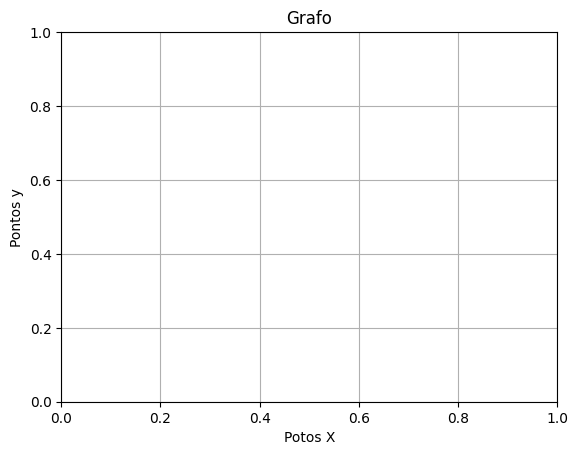


 [[0 0 0]
 [0 0 0]
 [0 0 0]] 



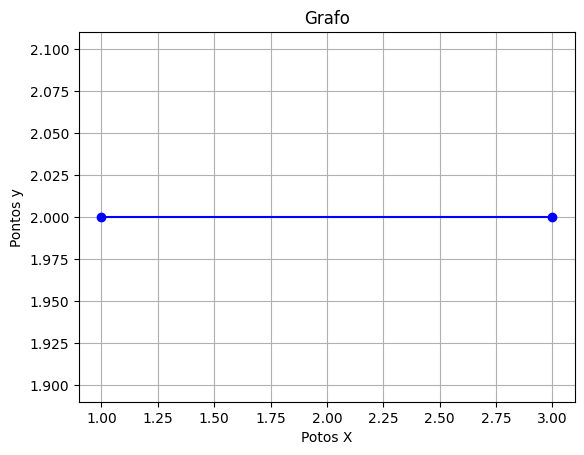


 [[0 1 0]
 [1 0 0]
 [0 0 0]] 



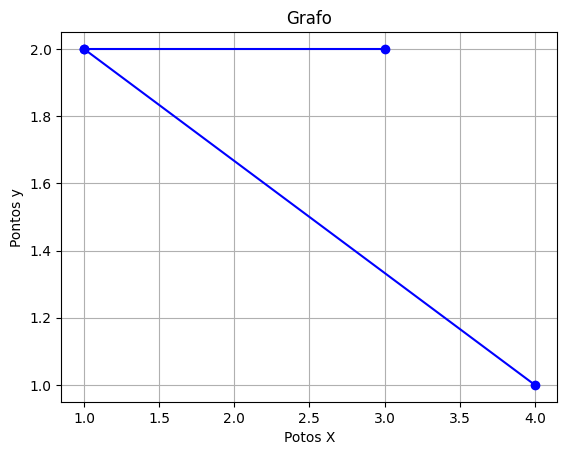


 [[0 1 1]
 [1 0 0]
 [1 0 0]] 



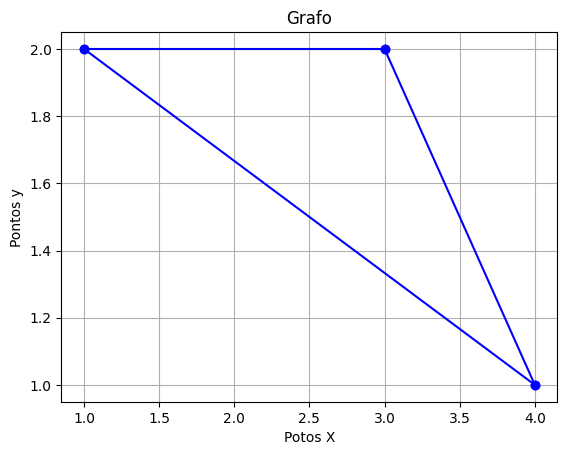


 [[0 1 1]
 [1 0 1]
 [1 1 0]] 



In [6]:
import numpy as np

class Grafo:

    def __init__(self): #nodo-->número de nodos
        
        self.nodos=0
        
        self.grafo=np.zeros(shape=(1,1),dtype=int)
        
        self.l_nodos=np.array([])

        self.x=np.array([])

        self.y=np.array([])


    def mostrar_grafo(self):
        
        print('\n',self.grafo,'\n')


    def mostrar_nodos(self):
        
        for i in range(0,len(self.l_nodos)):
            print('[',self.l_nodos[i].nome,'|',self.l_nodos[i].num,']')


    def adicionar_aresta(self, nome1 , nome2):
        
        n1,n2=retorna_nodo(self.l_nodos,nome1),retorna_nodo(self.l_nodos,nome2)
        
        if(n1!=0):
            if(n2!=0):
                if(n1.num!=n2.num):
            
                    self.grafo[n1.num - 1][n2.num - 1]+=1
                    
                    self.grafo[n2.num - 1][n1.num - 1]+=1

                else:
                    
                    print('Selecione nodos diferentes')
                    
            else:
                print('Nodo',nome2,'não presente no grafo')
        else:
            print('Nodo',nome1,'não presente no grafo')


    def adicionar_nodo(self,nome,x,y):
        
        if(len(self.l_nodos)>0):
            
            self.nodos+=1
            
            self.l_nodos=np.append(self.l_nodos,Node(self.nodos,nome))

            self.x=np.append(self.x,x)

            self.y=np.append(self.y,y)
            
            m=np.zeros(shape=(self.nodos,self.nodos),dtype=int)

            for i in range(0,self.nodos-1):
                for j in range(0,self.nodos-1):
                    m[i][j]=self.grafo[i][j]
        
            self.grafo=m

        else:
            self.nodos+=1

            self.x=np.append(self.x,x)

            self.y=np.append(self.y,y)
            
            self.l_nodos=np.append(self.l_nodos,Node(self.nodos,nome))


    def eliminar_nodo(self,nome):
        
        n=retorna_nodo(self.l_nodos,nome)
        
        if(n!=0):

            m=np.zeros(shape=(self.nodos-1,self.nodos-1),dtype=int)
            
            if(n.num!=self.nodos):
                for i in range(0,self.nodos-1):
                    
                    for j in range(0,self.nodos-1):
                        
                        if(i!=n.num-1 ):
                            
                            if(j!=n.num-1):
                                m[i][j]=self.grafo[i][j]
                            
                            else:
                                m[i][j]=self.grafo[i][j+1]
                        
                        else:
                            
                            if(j!=n.num-1):
                                m[i][j]=self.grafo[i+1][j]
                            
                            else:
                                m[i][j]=self.grafo[i+1][j+1]
                for k in range(n.num,len(self.l_nodos)):
                    self.l_nodos[k].num-=1

            else:
                for i in range(0,self.nodos-1):
                    
                    for j in range(0,self.nodos-1):
                        
                        m[i][j]=self.grafo[i][j]
                
            
            self.grafo=m
            
            self.l_nodos=np.delete(self.l_nodos, n.num-1)

            self.x=np.delete(self.x, n.num-1)

            self.y=np.delete(self.y, n.num-1)

            self.nodos-=1

            
    def eliminar_arestas(self, nome1, nome2):
        
        n1,n2=retorna_nodo(self.l_nodos,nome1),retorna_nodo(self.l_nodos,nome2)
        
        if(n1!=0):
            if(n2!=0):
                if(n1.num!=n2.num):
            
                    self.grafo[n1.num - 1][n2.num - 1]-=1
                    
                    self.grafo[n2.num - 1][n1.num - 1]-=1

                    if(retorna_grau_nodo(self.l_nodos,self.grafo,n1.nome)==0):
                        self.eliminar_nodo(n1.nome)
                    
                    if(retorna_grau_nodo(self.l_nodos,self.grafo,n2.nome)==0):
                        self.eliminar_nodo(n2.nome)

                else:
                    
                    self.grafo[n1.num - 1][n2.num - 1]-=1
                    
                    if(retorna_grau_nodo(self.l_nodos,self.grafo,n1.nome)==0):
                        self.eliminar_nodo(n1.nome)
                    
            else:
                print('Nodo',nome2,'não presente no grafo')
        else:
            print('Nodo',nome1,'não presente no grafo')
    

    def plotar_grafo(self):
        c=1
        for i in range(0,len(self.l_nodos)-1):
            for j  in range(c,len(self.l_nodos)):
                if(self.grafo[i][j]==1):
                    
                    X=np.array([self.x[i],self.x[j]])
                    
                    Y=np.array([self.y[i],self.y[j]])
                    
                    plt.plot(X,Y,'o' 'b')
                    plt.plot(X,Y,'' 'b')
            c+=1
        plt.grid()
        plt.title('Grafo')
        plt.xlabel('Potos X')
        plt.ylabel('Pontos y')
        plt.show()
        

g=Grafo()

g.adicionar_nodo(1,1,2)
g.adicionar_nodo(2,3,2)
g.adicionar_nodo(3,4,1)

g.plotar_grafo()
g.mostrar_grafo()

g.adicionar_aresta(1,2)
g.plotar_grafo()
g.mostrar_grafo()

g.adicionar_aresta(1,3)
g.plotar_grafo()
g.mostrar_grafo()

g.adicionar_aresta(3,2)
g.plotar_grafo()
g.mostrar_grafo()

